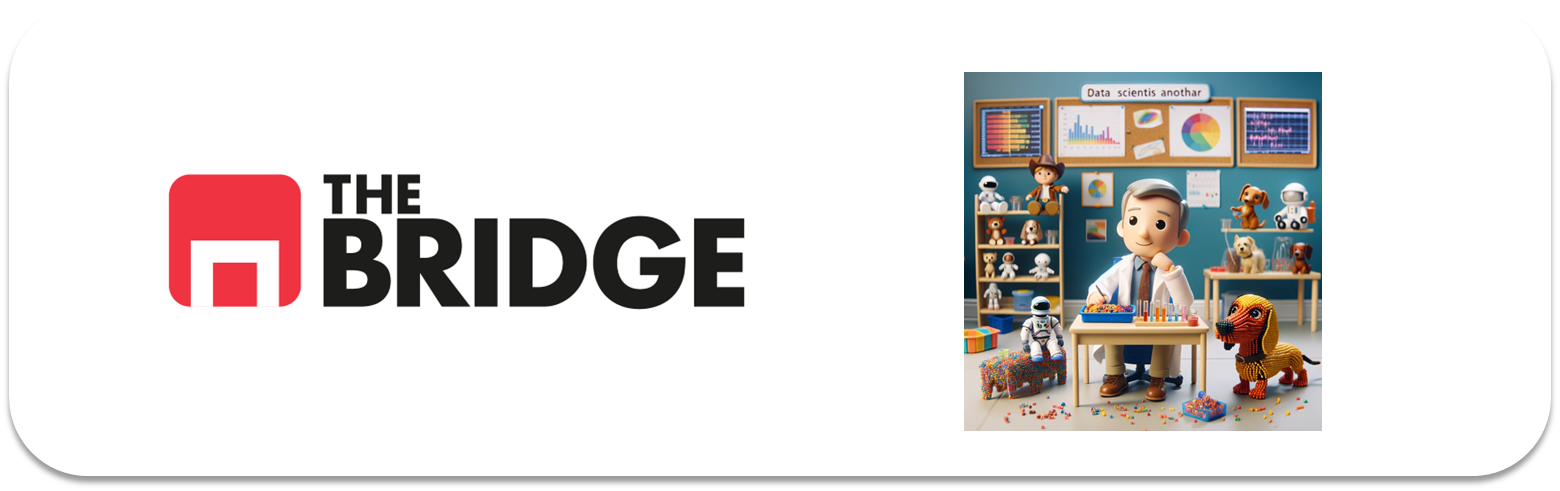

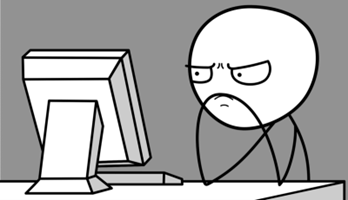

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Importación de paquetes básicos para análisis de datos
import pandas as pd   # Para manipulación y análisis de datos
import numpy as np    # Para cálculos matemáticos y manejo de matrices

# Importación de herramientas de visualización
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para visualización avanzada y atractiva

# Importación de herramientas para estadísticas y manejo de datos
from scipy import stats           # Para análisis estadísticos

# Configuración de los gráficos
plt.style.use('ggplot')           # Estilo de gráficos
sns.set_theme()                   # Establecer el tema de Seaborn

# Configuración de pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Importaciones completadas.")# Importación de paquetes básicos para análisis de datos
import pandas as pd   # Para manipulación y análisis de datos
import numpy as np    # Para cálculos matemáticos y manejo de matrices

# Importación de herramientas de visualización
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para visualización avanzada y atractiva

# Importación de herramientas para estadísticas y manejo de datos
from scipy import stats           # Para análisis estadísticos

# Configuración de los gráficos
plt.style.use('ggplot')           # Estilo de gráficos
sns.set_theme()                   # Establecer el tema de Seaborn

# Configuración de pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Importaciones completadas.")

Importaciones completadas.
Importaciones completadas.


### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [3]:
# Cargar el archivo en un DataFrame
ruta_archivo = r"C:\Users\hp\Desktop\Python Scripts\admission_data.csv"
df_admission = pd.read_csv(ruta_archivo)

# Mostrar una parte del contenido del DataFrame con estilo
print("Primeras filas del DataFrame con estilo:")
from IPython.display import display

# Aplicar estilo al DataFrame
df_styled = (
    df_admission.head().style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Mostrar el DataFrame estilizado
display(df_styled)

# Mostrar la información general del DataFrame
print("\nInformación general del DataFrame:")
print(df_admission.info())

Primeras filas del DataFrame con estilo:


,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None


### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

## Análisis
La variable Year representa el año académico o un período asociado con los datos. Para analizar esta variable, debemos:

Entender la distribución: Identificar si los valores están completos y qué rango abarca.
Revisar la cardinalidad: Determinar si hay suficiente diversidad en los valores para extraer información significativa.
Tomar decisiones: Basándonos en el análisis, decidir si la variable se usa como categórica (agrupada en intervalos), continua, o si debe ser transformada o excluida.

## Decisión:
Si Year representa un rango de años con sentido cronológico, podemos considerarlo como numérica continua para análisis como tendencias a lo largo del tiempo.
Si los años están fragmentados o hay huecos, podemos agruparlos en períodos (por ejemplo, quinquenios) y tratarlos como categóricos.

In [4]:
# Confirmar la existencia del DataFrame
if 'df_admission' in locals() or 'df_admission' in globals():
    # Descripción de la variable Year
    print("Descripción de la variable 'Year':")
    print(df_admission['Year'].describe())
    
    # Verificar valores únicos
    unique_years = df_admission['Year'].unique()
    print("\nValores únicos de 'Year':", unique_years)
    
    # Revisar si hay valores nulos
    missing_values = df_admission['Year'].isnull().sum()
    print(f"\nValores nulos en 'Year': {missing_values}")
    
    # Decisión y acción: 
    # Si hay un rango amplio y continuo -> numérica continua.
    # Si hay huecos o valores limitados -> categórica por períodos.
    
    # Agrupar en períodos de 5 años como ejemplo (puede ajustarse según contexto)
    df_admission['Year_Period'] = (df_admission['Year'] // 5) * 5
    print("\nAgrupación de 'Year' en períodos de 5 años:")
    print(df_admission[['Year', 'Year_Period']].head())

    # Mostrar DataFrame estilizado con las modificaciones
    from IPython.display import display
    df_styled = (
        df_admission[['Year', 'Year_Period']].head(10).style.set_table_styles(
            [
                {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
                {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
            ]
        ).set_properties(
            **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
        )
    )
    print("\nPrimeros valores de 'Year' agrupados con estilo:")
    display(df_styled)
else:
    print("El DataFrame 'df_admission' no está definido. Por favor, verifica tu código.")

# Respuesta sobre 'Year'
respuesta = """
La variable 'Year' puede analizarse como numérica continua si buscamos observar tendencias a lo largo del tiempo.
Sin embargo, si los datos están fragmentados, sería mejor agruparlos en intervalos (por ejemplo, períodos de 5 años) 
y analizarlos como categóricos. Esto puede facilitar la interpretación y reducir el ruido en el análisis.
"""
print("\nDecisión sobre la variable 'Year':")
print(respuesta)

Descripción de la variable 'Year':
count    12763.0
mean      1973.0
std          0.0
min       1973.0
25%       1973.0
50%       1973.0
75%       1973.0
max       1973.0
Name: Year, dtype: float64

Valores únicos de 'Year': [1973]

Valores nulos en 'Year': 0

Agrupación de 'Year' en períodos de 5 años:
   Year  Year_Period
0  1973         1970
1  1973         1970
2  1973         1970
3  1973         1970
4  1973         1970

Primeros valores de 'Year' agrupados con estilo:


,Year,Year_Period
0,1973,1970
1,1973,1970
2,1973,1970
3,1973,1970
4,1973,1970
5,1973,1970
6,1973,1970
7,1973,1970
8,1973,1970
9,1973,1970



Decisión sobre la variable 'Year':

La variable 'Year' puede analizarse como numérica continua si buscamos observar tendencias a lo largo del tiempo.
Sin embargo, si los datos están fragmentados, sería mejor agruparlos en intervalos (por ejemplo, períodos de 5 años) 
y analizarlos como categóricos. Esto puede facilitar la interpretación y reducir el ruido en el análisis.



### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

Frecuencias Absolutas de 'Major':
Major
Other                                                      7924
Department of Physics and Astronomy                        1246
School of Medicine                                          918
Department of Mechanical Engineering                        792
Department of Psychology                                    714
Department of Economics                                     585
School of Political Science and International Relations     584
Name: count, dtype: int64

Frecuencias Relativas de 'Major':
Major
Other                                                      0.620857
Department of Physics and Astronomy                        0.097626
School of Medicine                                         0.071927
Department of Mechanical Engineering                       0.062054
Department of Psychology                                   0.055943
Department of Economics                                    0.045836
School of Political Science and Inter

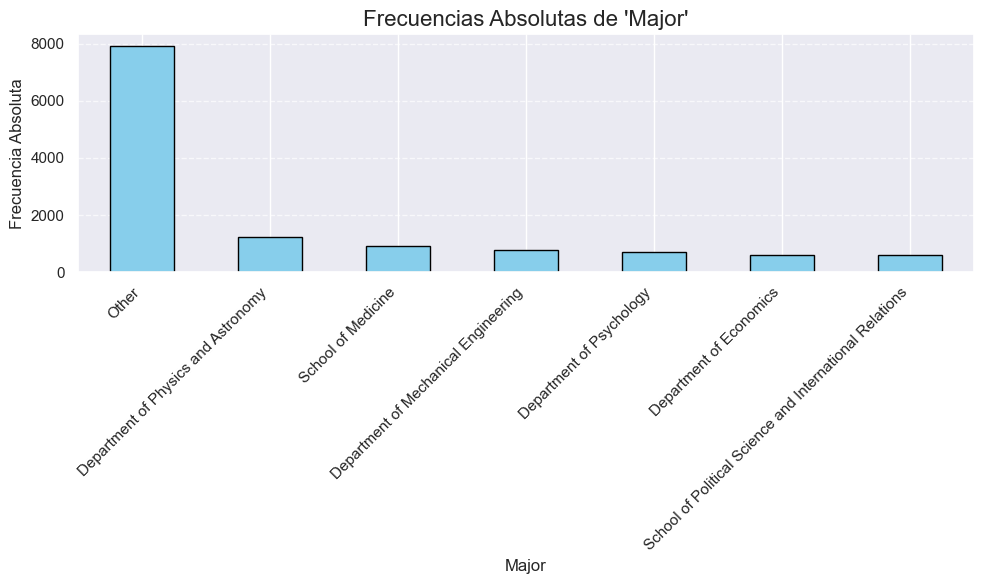

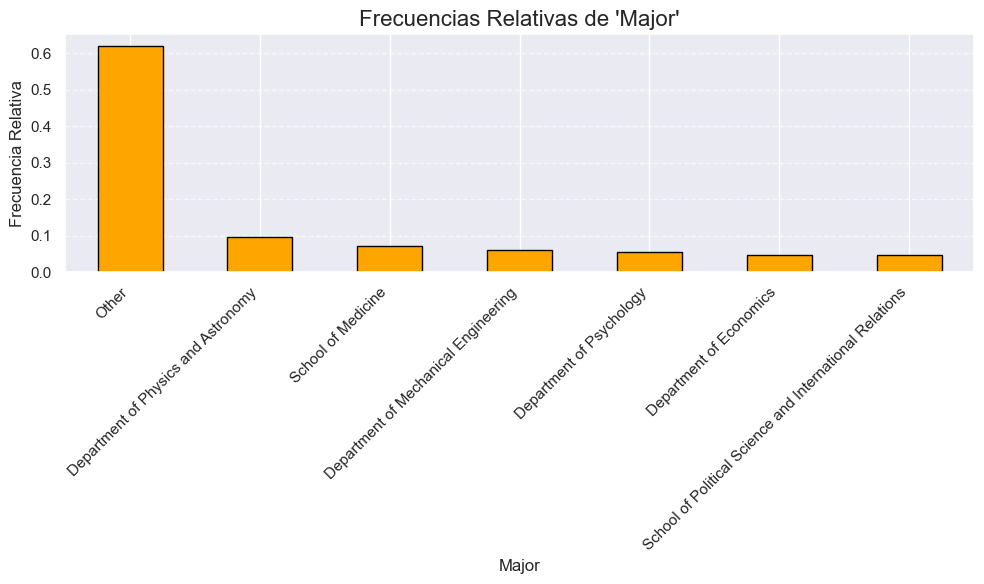

In [5]:
# Confirmar la existencia del DataFrame y la columna 'Major'
if 'df_admission' in locals() or 'df_admission' in globals():
    if 'Major' in df_admission.columns:
        import matplotlib.pyplot as plt
        
        # Obtener frecuencias absolutas
        frecuencias_absolutas = df_admission['Major'].value_counts()
        print("Frecuencias Absolutas de 'Major':")
        print(frecuencias_absolutas)
        
        # Obtener frecuencias relativas
        frecuencias_relativas = df_admission['Major'].value_counts(normalize=True)
        print("\nFrecuencias Relativas de 'Major':")
        print(frecuencias_relativas)

        # Graficar frecuencias absolutas
        plt.figure(figsize=(10, 6))
        frecuencias_absolutas.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title("Frecuencias Absolutas de 'Major'", fontsize=16)
        plt.xlabel("Major", fontsize=12)
        plt.ylabel("Frecuencia Absoluta", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Graficar frecuencias relativas
        plt.figure(figsize=(10, 6))
        frecuencias_relativas.plot(kind='bar', color='orange', edgecolor='black')
        plt.title("Frecuencias Relativas de 'Major'", fontsize=16)
        plt.xlabel("Major", fontsize=12)
        plt.ylabel("Frecuencia Relativa", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
    else:
        print("La columna 'Major' no existe en el DataFrame.")
else:
    print("El DataFrame 'df_admission' no está definido. Por favor, verifica tu código.")

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 



## Análisis:

### Frecuencias Absolutas:

Se puede observar cuántas veces aparece cada categoría en la columna Major. Esto permite identificar las carreras más comunes y las menos representadas.
Si algunas categorías tienen valores muy bajos o muy altos.

### Frecuencias Relativas:

Las frecuencias relativas (en porcentaje) ofrecen una perspectiva más general de la distribución de las categorías en el conjunto de datos.
Es útil para comparar las proporciones de las diferentes categorías en relación con el total.

### Gráficos:

Los gráficos de barras muestran de manera clara y visual las categorías más y menos representadas.
Un gráfico con frecuencias absolutas permite identificar rápidamente las categorías más populares.
Un gráfico con frecuencias relativas ayuda a interpretar proporciones, lo cual es importante en contextos donde se comparan poblaciones de distinto tamaño.

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

## Comentarios:

### Representación de Carreras (Major):

Es posible que algunas carreras tengan una gran mayoría de alumnos admitidos, lo cual puede reflejar una mayor demanda o preferencia por esas áreas.
Las carreras con pocas admisiones pueden ser especializaciones más nicho o menos populares en este contexto.

### Posible Discriminación o Desbalance:

Si una o más carreras tienen una representación desproporcionadamente baja, esto podría requerir mayor análisis. Podría estar relacionado con factores de admisión, políticas del departamento o demografía.

### Oportunidades de Mejora:

Si la distribución es altamente desbalanceada, sería útil investigar si los criterios de admisión son equitativos entre las diferentes carreras.
También podría ser relevante entender si hay factores externos (como preferencias del mercado laboral) 

### desigualdad.
En resumen, los datos muestran información valiosa sobre las carreras representadas y sus proporciones, lo cual es un buen punto de partida para detectar posibles patrones de desigualdad o sesgos en las admisiones. 

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

Frecuencias Absolutas:
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

Frecuencias Relativas:
Admission
Rejected    59.006503
Accepted    40.993497
Name: proportion, dtype: float64


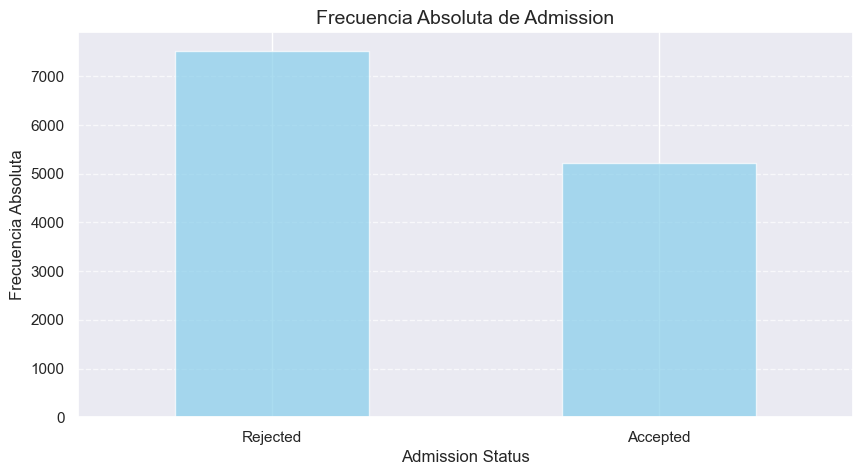

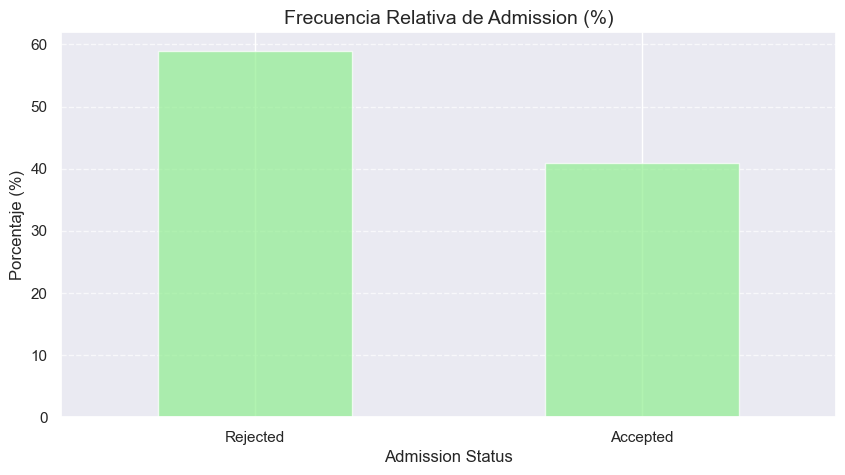

In [6]:
# Obtener las frecuencias absolutas y relativas de la columna 'Admission'
frecuencias_absolutas = df_admission['Admission'].value_counts()
frecuencias_relativas = df_admission['Admission'].value_counts(normalize=True) * 100

# Imprimir las frecuencias
print("Frecuencias Absolutas:")
print(frecuencias_absolutas)

print("\nFrecuencias Relativas:")
print(frecuencias_relativas)

# Importar biblioteca para visualización
import matplotlib.pyplot as plt

# Crear el gráfico de frecuencias absolutas
plt.figure(figsize=(10, 5))
frecuencias_absolutas.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Frecuencia Absoluta de Admission', fontsize=14)
plt.xlabel('Admission Status', fontsize=12)
plt.ylabel('Frecuencia Absoluta', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Crear el gráfico de frecuencias relativas
plt.figure(figsize=(10, 5))
frecuencias_relativas.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Frecuencia Relativa de Admission (%)', fontsize=14)
plt.xlabel('Admission Status', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

## Frecuencias Absolutas:

Se observa que 7531 solicitudes fueron rechazadas (Rejected).
5232 solicitudes fueron aceptadas (Accepted).
Esto indica una diferencia significativa entre el número de solicitudes rechazadas y aceptadas.

## Frecuencias Relativas:

El 59% de las solicitudes fueron rechazadas.
El 41% de las solicitudes fueron aceptadas.
Este análisis sugiere que una proporción considerable de las solicitudes no cumple con los criterios de admisión, lo que podría estar relacionado con las políticas o los requisitos de los departamentos.

## Gráficos:

Los gráficos de barras muestran de forma clara la diferencia entre los rechazos y las aceptaciones, tanto en valores absolutos como en porcentajes.
La visualización de las frecuencias relativas es útil para entender la distribución en términos de proporciones, lo cual puede ser más relevante cuando se compara con otros datasets o períodos de tiempo.

## Conclusión: 
Este análisis preliminar sugiere que es importante investigar cuáles son los factores que más influyen en las decisiones de admisión. 


### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [7]:
# Ruta del archivo tips.csv
ruta_tips = r"C:\Users\hp\Desktop\Python Scripts\tips.csv"

# Cargar el archivo en un DataFrame
df_tips = pd.read_csv(ruta_tips)

# Mostrar una parte del contenido del DataFrame con estilo
print("Parte del contenido del DataFrame (estilizado):")
df_tips_styled = (
    df_tips.head(10)  # Mostrar las primeras 10 filas
    .style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df_tips.info())

# Si estás en un entorno interactivo como Jupyter Notebook:
display(df_tips_styled)


Parte del contenido del DataFrame (estilizado):

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,9,14.780000,3.230000,Male,No,Sun,Dinner,2


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [8]:
# Seleccionar las columnas numéricas del DataFrame
numericas = df_tips.select_dtypes(include=['float64', 'int64'])

# Calcular las medidas de tendencia central y posición
resumen_estadisticas = numericas.describe().T

# Agregar la mediana como una fila adicional
resumen_estadisticas['median'] = numericas.median()

# Agregar el rango intercuartílico (IQR)
resumen_estadisticas['IQR'] = resumen_estadisticas['75%'] - resumen_estadisticas['25%']

# Redondear valores para mayor claridad
resumen_estadisticas = resumen_estadisticas.round(2)

# Mostrar las estadísticas en una tabla estilizada
resumen_styled = (
    resumen_estadisticas.style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Imprimir el DataFrame con estilo
print("Medidas de tendencia central, posición y rangos para variables numéricas:")
display(resumen_styled)

Medidas de tendencia central, posición y rangos para variables numéricas:


,count,mean,std,min,25%,50%,75%,max,median,IQR
Unnamed: 0,244.000000,121.500000,70.580000,0.000000,60.750000,121.500000,182.250000,243.000000,121.500000,121.500000
total_bill,244.000000,19.790000,8.900000,3.070000,13.350000,17.800000,24.130000,50.810000,17.800000,10.780000
tip,244.000000,3.000000,1.380000,1.000000,2.000000,2.900000,3.560000,10.000000,2.900000,1.560000
size,244.000000,2.570000,0.950000,1.000000,2.000000,2.000000,3.000000,6.000000,2.000000,1.000000


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

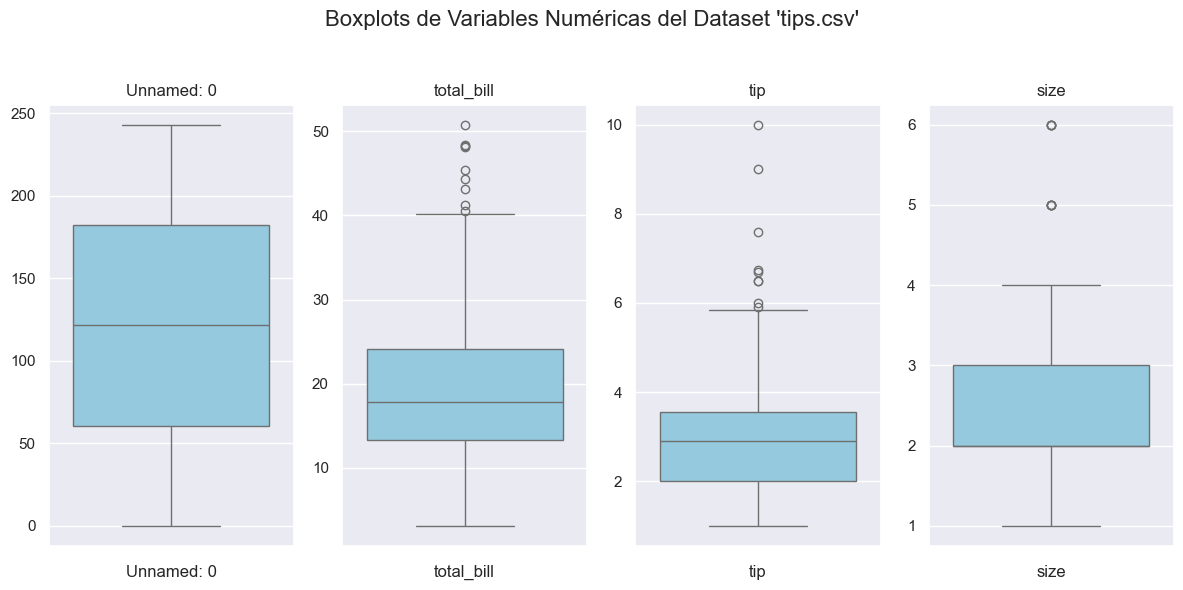

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas del DataFrame
numericas = df_tips.select_dtypes(include=['float64', 'int64'])

# Configuración general para los boxplots
plt.figure(figsize=(12, 6))
plt.suptitle("Boxplots de Variables Numéricas del Dataset 'tips.csv'", fontsize=16)

# Generar un boxplot para cada variable numérica
for i, column in enumerate(numericas.columns, 1):
    plt.subplot(1, len(numericas.columns), i)
    sns.boxplot(y=numericas[column], color="skyblue")
    plt.title(column)
    plt.ylabel("")
    plt.xlabel(column)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar los diagramas
plt.show()

## 1. Unnamed: 0
Este campo probablemente representa un índice o identificador de filas.
Los datos están distribuidos de manera uniforme dentro de su rango, sin valores atípicos visibles.


## 2. total_bill
La mayoría de los valores de las facturas (total_bill) se concentran entre 10 y 30 unidades monetarias.
Existen varios valores atípicos por encima de 40 unidades. Esto podría representar casos donde los clientes realizaron compras inusualmente grandes.
Este rango de outliers puede ser útil para explorar patrones relacionados con facturas altas.

## tip
Las propinas (tip) suelen estar en el rango de 1 a 5 unidades monetarias, con una mediana cercana a 2.5.
Hay algunos valores atípicos significativos por encima de 6 unidades, lo que puede indicar generosidad extraordinaria o una relación proporcional a facturas altas.

## Size
El tamaño del grupo (size) está altamente concentrado entre 2 y 4 personas, con una mediana de 2.
Existen valores atípicos (grupos con tamaños de 5 o más) que podrían representar eventos o reuniones inusuales.
No hay valores extremos bajos.

## Conclusiones generales:
### Valores atípicos:

Las variables total_bill y tip muestran valores atípicos superiores, lo cual es común en datos relacionados con gastos y propinas.
Es importante evaluar si estos valores representan errores, casos especiales o información valiosa.

### Distribuciones:

Las distribuciones para total_bill, tip y size parecen razonables para datos de restaurantes.
Los datos están sesgados hacia la izquierda, indicando una concentración de valores bajos.

### Acciones posibles:

Analizar los valores atípicos para entender mejor su origen.
Investigar las relaciones entre total_bill, tip y size para identificar patrones en el comportamiento de los clientes.


### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

In [26]:
# Seleccionar variables categóricas
categorical_vars = df_tips.select_dtypes(include=['object']).columns

# Crear un diccionario para almacenar las frecuencias
frequencies = {}

for var in categorical_vars:
    frequencies[var] = {
        'frecuencia_absoluta': df_tips[var].value_counts(),
        'frecuencia_relativa': df_tips[var].value_counts(normalize=True)
    }

# Mostrar frecuencias
for var, freq in frequencies.items():
    print(f"\nFrecuencias de la variable '{var}':")
    print("Frecuencia Absoluta:")
    print(freq['frecuencia_absoluta'])
    print("\nFrecuencia Relativa:")
    print(freq['frecuencia_relativa'])


Frecuencias de la variable 'sex':
Frecuencia Absoluta:
sex
Male      157
Female     87
Name: count, dtype: int64

Frecuencia Relativa:
sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64

Frecuencias de la variable 'smoker':
Frecuencia Absoluta:
smoker
No     151
Yes     93
Name: count, dtype: int64

Frecuencia Relativa:
smoker
No     0.618852
Yes    0.381148
Name: proportion, dtype: float64

Frecuencias de la variable 'day':
Frecuencia Absoluta:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Frecuencia Relativa:
day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

Frecuencias de la variable 'time':
Frecuencia Absoluta:
time
Dinner    176
Lunch      68
Name: count, dtype: int64

Frecuencia Relativa:
time
Dinner    0.721311
Lunch     0.278689
Name: proportion, dtype: float64


# Análisis de Frecuencias

## Variable 'sex':
### Frecuencia Absoluta:
Male: 157
Female: 87
### Frecuencia Relativa:
Male: 64.34%
Female: 35.66%
## Interpretación: 
Hay una mayor proporción de hombres que de mujeres en el conjunto de datos, 

## Variable 'smoker':
### Frecuencia Absoluta:
No: 151
Yes: 93
### Frecuencia Relativa:
No: 61.88%
Yes: 38.11%
## Interpretación: 
La mayoría de los clientes no son fumadores, lo que podría influir en la oferta de productos o servicios 
relacionados con la salud o el bienestar.

## Variable 'time':
### Frecuencia Relativa:
Dinner: 72.13%
Lunch: 27.87%
## Interpretación: 
La mayoría de las visitas o ventas se realizan durante la cena, lo que podría ser relevante para la planificación de recursos, 
promociones o campañas de marketing dirigidas a ese momento del día.

Resumen y Destacados
Desbalance de Género: La diferencia notable en la proporción de hombres y mujeres puede indicar que el negocio o servicio 
está más orientado hacia un género específico. 

Preferencias de Comportamiento: La mayor proporción de no fumadores sugiere que las estrategias de marketing podrían enfocarse más en el bienestar 
y la salud, en lugar de productos que se dirijan a fumadores.

Momentos de Consumo: La predominancia de la cena sobre el almuerzo indica que es crucial optimizar la experiencia 
del cliente durante las horas de la cena,


Explicación del código:
Cargar el dataset: Usamos pd.read_csv para cargar el archivo CSV en un DataFrame.
Visualizar el DataFrame: Mostramos las primeras 10 filas del DataFrame con un estilo específico.
Información general: Usamos df_tips.info() para mostrar información general sobre el DataFrame.
Calcular frecuencias:
Seleccionamos las variables categóricas utilizando select_dtypes(include=['object']).
Creamos un diccionario para almacenar las frecuencias absolutas y relativas de cada variable categórica.
Usamos value_counts() para obtener las frecuencias absolutas y value_counts(normalize=True) para obtener las frecuencias relativas.
Mostrar resultados: Iteramos sobre el diccionario de frecuencias y mostramos tanto las frecuencias absolutas como las relativas para cada variable categórica.
Notas:
Asegúrate de que el archivo tips.csv esté en la ruta especificada.
Este código se puede ejecutar en un entorno de Jupyter Notebook o en un script de Python. Si usas Jupyter Notebook, puedes descomentar la línea display(df_tips_styled) para mostrar el DataFrame estilizado.
Destacar:
Al analizar las frecuencias absolutas y relativas, puedes identificar qué categorías son más comunes en cada variable, lo que puede proporcionar información valiosa sobre el conjunto de datos. Por ejemplo, podrías destacar qué tipo de propinas son más frecuentes o si hay alguna tendencia en el género de los clientes.

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)


In [15]:
import pandas as pd

# Cargar el dataset
file_path = r"C:\Users\hp\Desktop\Python Scripts\Marketing-Customer-Analysis (2).csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para entender su estructura
print(df.head())

# Seleccionar las variables categóricas de interés
categorical_vars = ['education', 'state', 'employmentstatus', 'gender', 'marital_status', 'vehicle_class', 'vehicle_size']

# Calcular la moda de cada variable categórica
modes = df[categorical_vars].mode().iloc[0]

# Mostrar la moda de cada variable
print("Modas de las variables categóricas:")
print(modes)

# Crear una nueva columna que combine las variables categóricas
df['profile'] = df[categorical_vars].astype(str).agg('-'.join, axis=1)

# Calcular la moda de la nueva columna 'profile'
profile_mode = df['profile'].mode()[0]

# Mostrar el perfil típico del cliente
print("\nPerfil típico del cliente (combinación de variables):")
print(profile_mode)

# Crear un nuevo DataFrame con la información del perfil típico
df_profile = pd.DataFrame(modes).T  # Transponemos para que las variables sean columnas
df_profile['profile'] = profile_mode  # Agregamos la columna del perfil típico

# Mostrar el nuevo DataFrame
print("\nDataFrame del perfil típico del cliente:")

  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    6

In [ ]:
import pandas as pd

# Cargar el dataset
file_path = r"C:\Users\hp\Desktop\Python Scripts\Marketing-Customer-Analysis (2).csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para entender su estructura
print(df.head())

# Seleccionar las variables categóricas de interés
categorical_vars = ['education', 'state', 'employmentstatus', 'gender', 'marital_status', 'vehicle_class', 'vehicle_size']

# Calcular la moda de cada variable categórica
modes = df[categorical_vars].mode().iloc[0]

# Mostrar la moda de cada variable
print("Modas de las variables categóricas:")
print(modes)

# Crear una nueva columna que combine las variables categóricas
df['profile'] = df[categorical_vars].astype(str).agg('-'.join, axis=1)

# Calcular la moda de la nueva columna 'profile'
profile_mode = df['profile'].mode()[0]

# Mostrar el perfil típico del cliente
print("\nPerfil típico del cliente (combinación de variables):")
print(profile_mode)

  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    6

In [16]:
df_profile

,education,state,employmentstatus,gender,marital_status,vehicle_class,vehicle_size,profile
0,Bachelor,California,Employed,F,Married,Four-Door Car,Medsize,College-California-Employed-F-Married-Four-Doo...
